In [1]:
cd /pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis/

/pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis


In [2]:
import pickle
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import json
import gc
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
data_path = 'Data/sepsis_removed_0.pkl'
pkl = pickle.load(open(data_path, 'rb'))
data = pkl[0]
oc = pkl[1]
train_ind = pkl[2]
valid_ind = pkl[3]
test_ind = pkl[4]
del pkl

In [4]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_inds = pos_oc['ts_ind'].to_list()

In [5]:
data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.000000,1.000000
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.000000,1.000000
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.000000,1.000000
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.000000,1.000000
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.000000,1.000000
...,...,...,...,...,...,...,...
82886223,57281,20.400000,MBP,0.195381,chart,78.552377,17.645628
82886224,57281,20.400000,O2 Saturation,-0.678068,chart,96.820961,4.160290
82886225,57281,20.400000,RR,0.179866,chart,26.278501,15.130729
82886226,57281,20.400000,SBP,-0.404061,chart,120.239648,25.341836


In [6]:
text_data = data[data.variable == 'Text']
text_data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.0,1.0
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.0,1.0
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.0,1.0
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.0,1.0
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
1407425,31015,99.400000,Text,NPN\n\n\n#1 Infant remains in RA with O2 sats...,noteevents,1.0,1.0
1407426,31015,105.783333,Text,"Neonatology\nDOL #5, CGA 36 weeks. \n\nCVR: Co...",noteevents,1.0,1.0
1407427,31015,112.650000,Text,Family Meeting Note\nFamily meeting held with ...,noteevents,1.0,1.0
1407428,31015,114.033333,Text,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...,noteevents,1.0,1.0


In [7]:
text_data.sort_values(['ts_ind', 'hour'])

,ts_ind,hour,variable,value,TABLE,mean,std
638818,0,5.683333,Text,rn progress note\nneuro; pt aox3 pt affect slo...,noteevents,1.0,1.0
453442,0,9.066667,Text,[**2198-2-15**] 8:32 AM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
453932,0,11.133333,Text,[**2198-2-15**] 10:36 AM\n CHEST (PORTABLE AP)...,noteevents,1.0,1.0
453987,0,15.666667,Text,[**2198-2-15**] 3:08 PM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
638069,0,18.933333,Text,RESP: PT. INTUBATED AFTER SEVERAL ATTEMPT AT N...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
742243,57280,16.966667,Text,TRANSFER NOTE FROM N-SICU\nD: 80 YR OLD RETIRE...,noteevents,1.0,1.0
675206,57281,1.000000,Text,Mr. [**Known lastname 829**] is a 60 yr gentle...,noteevents,1.0,1.0
17469,57281,5.400000,Text,PATIENT/TEST INFORMATION:\nIndication: Coronar...,noteevents,1.0,1.0
675207,57281,9.300000,Text,"CCU NPN 1900-0700\nS: "" Can I go home tomorrow...",noteevents,1.0,1.0


In [8]:
oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
1,1,188028,270,0
2,2,173727,271,0
3,3,164716,272,0
4,4,158689,273,0
...,...,...,...,...
57376,45558,143774,94944,0
57377,45559,123750,94950,0
57378,50487,196881,94953,0
57379,45560,118475,94954,0


In [9]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
8,7,192224,279,1
25,48221,179726,292,1
43,31,194340,305,1
68,52,172132,329,1
...,...,...,...,...
57274,45480,187410,90658,1
57311,45509,133967,91950,1
57343,45536,116543,94828,1
57347,45540,133042,94846,1


In [24]:
pos_inds = pos_oc['ts_ind'].to_list()

## ALL

In [11]:
text_data_120 = text_data[text_data.hour <= 120].reset_index()
text_data_120

,index,ts_ind,hour,variable,value,TABLE,mean,std
0,1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.0,1.0
1,3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.0,1.0
2,4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.0,1.0
3,5,18965,92.083333,Text,Admission Date: [**2141-7-9**] D...,noteevents,1.0,1.0
4,8,53658,1.433333,Text,Admission Date: [**2145-11-30**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
764862,1407425,31015,99.400000,Text,NPN\n\n\n#1 Infant remains in RA with O2 sats...,noteevents,1.0,1.0
764863,1407426,31015,105.783333,Text,"Neonatology\nDOL #5, CGA 36 weeks. \n\nCVR: Co...",noteevents,1.0,1.0
764864,1407427,31015,112.650000,Text,Family Meeting Note\nFamily meeting held with ...,noteevents,1.0,1.0
764865,1407428,31015,114.033333,Text,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...,noteevents,1.0,1.0


In [12]:
stopwords = set(STOPWORDS)
stopwords.add('-')
stopwords.add('kg')
stopwords.add('______________________________________________________________________________ FINAL')
stopwords.add('Hospital')
stopwords.add('MEDICAL')
stopwords.add('image002')
stopwords.add('mg')
stopwords.add('Mg')
stopwords.add('Number')
stopwords.add('year old')
# stopwords.add('old')
stopwords.add('year')
stopwords.add('s')
stopwords.add('p')
stopwords.add('L')
stopwords.add('mEq')
stopwords.add('_')
stopwords.add('mL')
stopwords.add('dL')
stopwords.add('Name')
stopwords.add('lastname')
stopwords.add('Last Name')
stopwords.add('First Name')
stopwords.add('patient')

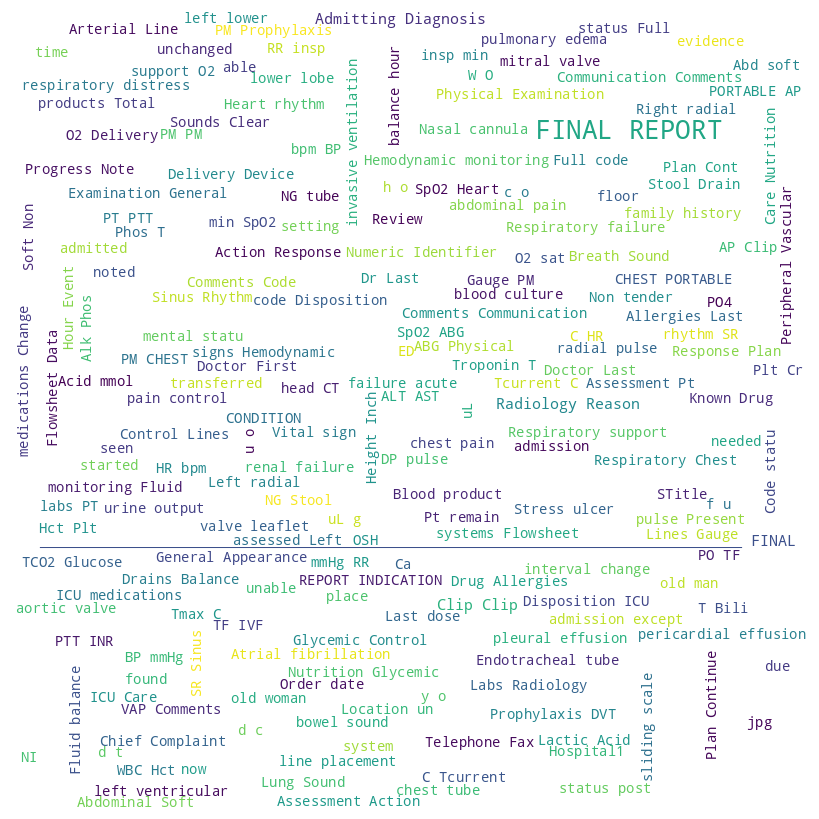

In [13]:
texts_120 = " ".join(text for text in text_data_120.value)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(texts_120)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('120_all.png')

## POS

In [14]:
text_data_120_pos = text_data_120[text_data_120['ts_ind'].isin(pos_inds)]
text_data_120_pos

,index,ts_ind,hour,variable,value,TABLE,mean,std
1,3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.0,1.0
8,15,20060,51.050000,Text,Admission Date: [**2196-8-20**] ...,noteevents,1.0,1.0
13,24,32723,26.316667,Text,Admission Date: [**2189-9-7**] D...,noteevents,1.0,1.0
20,33,10938,48.233333,Text,Admission Date: [**2130-12-15**] Discha...,noteevents,1.0,1.0
26,48,37555,67.333333,Text,Admission Date: [**2164-10-1**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
759832,1391063,36491,105.516667,Text,TITLE:\n Chief Complaint: Respiratory failur...,noteevents,1.0,1.0
759846,1391080,28427,59.833333,Text,TITLE:\n Chief Complaint:\n 24 Hour Events...,noteevents,1.0,1.0
759853,1391087,35960,57.000000,Text,Chief Complaint:\n 24 Hour Events:\n -fax ...,noteevents,1.0,1.0
759854,1391088,41625,63.183333,Text,TITLE:\n Chief Complaint:\n 24 Hour Events...,noteevents,1.0,1.0


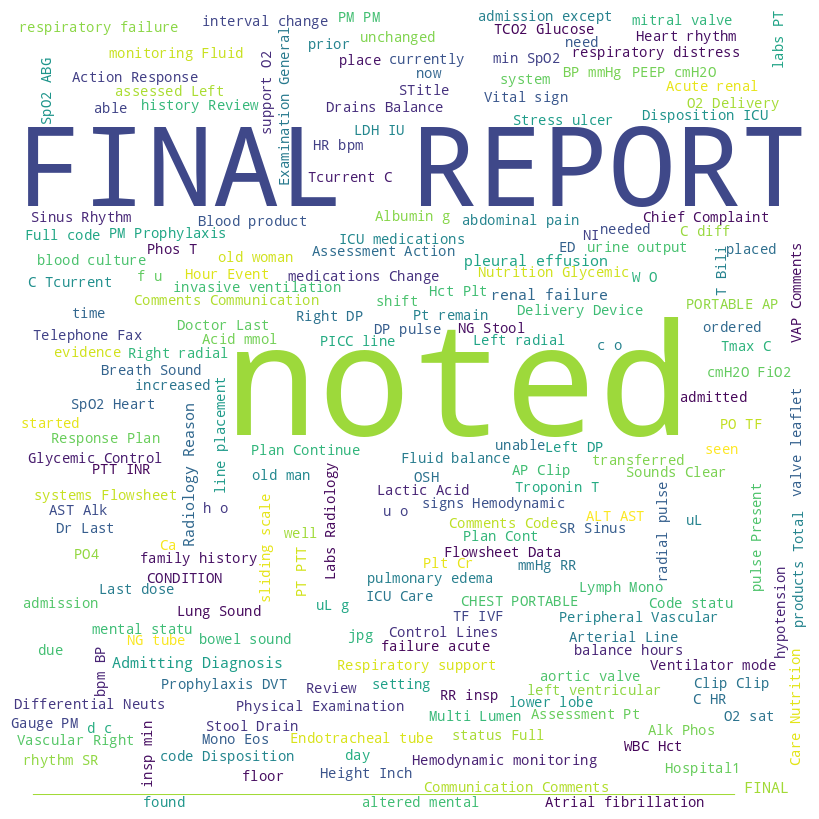

In [15]:
texts_120_pos = " ".join(text for text in text_data_120_pos.value)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(texts_120_pos)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('120_pos.png')

In [16]:
pos_words = wordcloud.words_.keys()
pos_words

dict_keys(['noted', 'FINAL REPORT', '______________________________________________________________________________ FINAL', 'Admitting Diagnosis', 'Radiology Reason', 'renal failure', 'pleural effusion', 'now', 'CONDITION', 'Clip Clip', 'Lung Sound', 'PM PM', 'unchanged', 'seen', 'respiratory failure', 'h o', 'f u', 'Code statu', 'uL', 'Doctor Last', 'Review', 'HR bpm', 'mental statu', 'started', 'evidence', 'Vital sign', 'old man', 'Fluid balance', 'Blood product', 'Full code', 'PORTABLE AP', 'Chief Complaint', 'setting', 'insp min', 'Hemodynamic monitoring', 'Last dose', 'DP pulse', 'radial pulse', 'Heart rhythm', 'ICU Care', 'Physical Examination', 'monitoring Fluid', 'Flowsheet Data', 'balance hours', 'signs Hemodynamic', 'Plan Continue', 'Prophylaxis DVT', 'Labs Radiology', 'BP mmHg', 'ICU medications', 'RR insp', 'bpm BP', 'min SpO2', 'mmHg RR', 'Tmax C', 'C HR', 'admission', 'O2 Delivery', 'Hct Plt', 'Glycemic Control', 'Delivery Device', 'Stress ulcer', 'SpO2 Heart', 'WBC Hct',

In [17]:
wordcloud.words_

{'noted': 1.0,
 'FINAL REPORT': 0.9902196503525001,
 '______________________________________________________________________________ FINAL': 0.9848404580463752,
 'Admitting Diagnosis': 0.9546028770528546,
 'Radiology Reason': 0.9486939158074901,
 'renal failure': 0.9363462243775215,
 'pleural effusion': 0.9363462243775215,
 'now': 0.861648803944741,
 'CONDITION': 0.8490566037735849,
 'Clip Clip': 0.8398875259790538,
 'Lung Sound': 0.8343045763886059,
 'PM PM': 0.8319002404335955,
 'unchanged': 0.8096499449855332,
 'seen': 0.7821019601450752,
 'respiratory failure': 0.7681649618973878,
 'h o': 0.7645788336933045,
 'f u': 0.7233791108032113,
 'Code statu': 0.6993765027099719,
 'uL': 0.697216675496149,
 'Doctor Last': 0.6804678267248054,
 'Review': 0.6801825665267534,
 'HR bpm': 0.6774929703736908,
 'mental statu': 0.6768409470638576,
 'started': 0.6765149354089409,
 'evidence': 0.6757406577285138,
 'Vital sign': 0.6753331431598679,
 'old man': 0.6645340070907535,
 'Fluid balance': 0.6626

In [18]:
len(pos_words)

200

In [19]:
'sepsis' in pos_words

False

In [20]:
'septic' in pos_words

False

In [21]:
'SIRS' in pos_words

False

## NEG

In [22]:
text_data_120_neg = text_data_120[~text_data_120['ts_ind'].isin(pos_inds)]
text_data_120_neg

,index,ts_ind,hour,variable,value,TABLE,mean,std
0,1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.0,1.0
2,4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.0,1.0
3,5,18965,92.083333,Text,Admission Date: [**2141-7-9**] D...,noteevents,1.0,1.0
4,8,53658,1.433333,Text,Admission Date: [**2145-11-30**] ...,noteevents,1.0,1.0
5,9,55730,17.083333,Text,Admission Date: [**2194-8-15**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
764862,1407425,31015,99.400000,Text,NPN\n\n\n#1 Infant remains in RA with O2 sats...,noteevents,1.0,1.0
764863,1407426,31015,105.783333,Text,"Neonatology\nDOL #5, CGA 36 weeks. \n\nCVR: Co...",noteevents,1.0,1.0
764864,1407427,31015,112.650000,Text,Family Meeting Note\nFamily meeting held with ...,noteevents,1.0,1.0
764865,1407428,31015,114.033333,Text,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...,noteevents,1.0,1.0


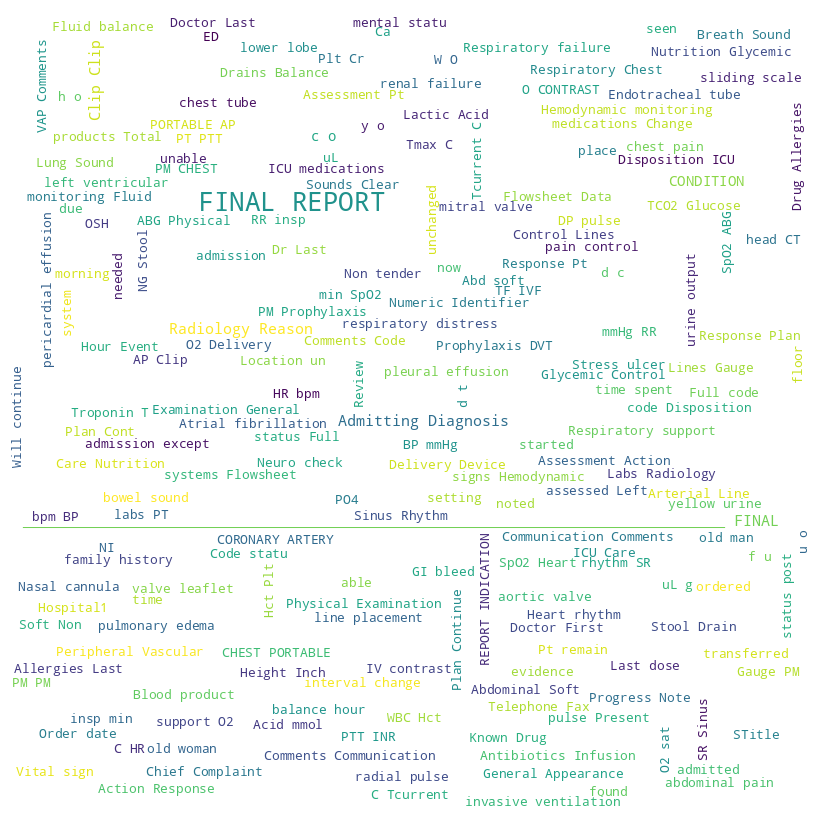

In [23]:
texts_120_neg = " ".join(text for text in text_data_120_neg.value)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(texts_120_neg)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('120_neg.png')